In [1199]:
import numpy as np
import matplotlib.pyplot as plt

In [1200]:
img = plt.imread('dataset/R1-1.jpg') / 255
img

array([[[0.68235294, 0.69019608, 0.67058824],
        [0.68235294, 0.69019608, 0.67058824],
        [0.68627451, 0.69411765, 0.6745098 ],
        ...,
        [0.57647059, 0.45490196, 0.34509804],
        [0.57254902, 0.45098039, 0.34117647],
        [0.57254902, 0.45098039, 0.34117647]],

       [[0.67843137, 0.68627451, 0.66666667],
        [0.68235294, 0.69019608, 0.67058824],
        [0.68627451, 0.69411765, 0.6745098 ],
        ...,
        [0.58039216, 0.45882353, 0.34901961],
        [0.57647059, 0.45490196, 0.34509804],
        [0.57647059, 0.45490196, 0.34509804]],

       [[0.67843137, 0.68627451, 0.66666667],
        [0.68235294, 0.69019608, 0.67058824],
        [0.68235294, 0.69019608, 0.67058824],
        ...,
        [0.58823529, 0.4627451 , 0.36470588],
        [0.58431373, 0.45882353, 0.36078431],
        [0.58039216, 0.45490196, 0.35686275]],

       ...,

       [[0.47843137, 0.33333333, 0.23137255],
        [0.47843137, 0.33333333, 0.23137255],
        [0.47843137, 0

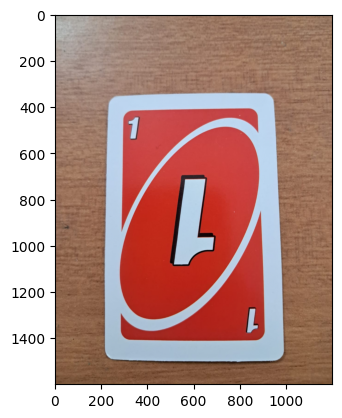

In [1201]:
plt.imshow(img)

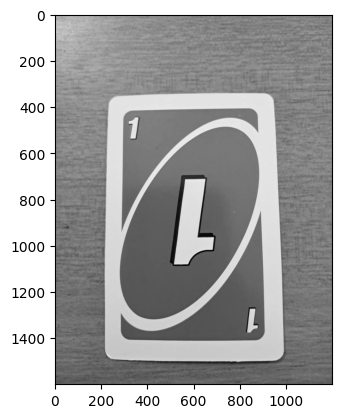

In [1202]:
img_mean = np.mean(img, axis=2)
plt.imshow(img_mean, cmap='gray')

In [1203]:
import cv2
import numpy as np
import cv2
num_val=2

def get_card():
    # num = np.random.choice(['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', 'd', 's', 'r'])
    # suit = np.random.choice(['R', 'B', 'G', 'Y'])
    num = '2'
    suit = 'W'
    img_num='3'
    # img_num = np.random.randint(1, 6)
    # img_num = 5
    img_path = f'dataset/{suit}{num}-{img_num}.jpg'
    print(f'Getting card: {img_path}')
    return cv2.imread(img_path)


image = get_card()

# Function to rotate the image 90 degrees clockwise
def rotate_image(image):
    return cv2.rotate(image, cv2.ROTATE_90_CLOCKWISE)


if image is None:
    print("Error: Unable to load image!")
else:
    # Get the dimensions of the image (height, width, channels)
    height, width = image.shape[:2]

    # Check if the height (length) is greater than the width (breadth)
    if height < width:
        print(f"Rotating image... (Height: {height}, Width: {width})")
        image = rotate_image(image)
    else:
        print(f"No rotation needed. (Height: {height}, Width: {width})")

    # Convert BGR to RGB for Matplotlib
    # img_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

    # # Plot the image using Matplotlib
    # plt.imshow(img_rgb)
    # plt.axis('off')  # Turn off the axis
    # plt.title("Processed Image")
    # plt.show()
# # Resize the image for easier processing (optional)
# scale_percent = 50  # percentage of original size
# width = int(image.shape[1] * scale_percent / 100)
# height = int(image.shape[0] * scale_percent / 100)
# dim = (width, height)
# resized_image = cv2.resize(image, dim, interpolation=cv2.INTER_AREA)

resized_image = image
# Convert to grayscale
gray = cv2.cvtColor(resized_image, cv2.COLOR_BGR2GRAY)

# Apply GaussianBlur to reduce noise
blurred = cv2.GaussianBlur(gray, (5, 5), 3)

# Apply edge detection
edges = cv2.Canny(blurred, 50, 150)

Getting card: dataset/W2-3.jpg
No rotation needed. (Height: 1600, Width: 1200)


In [1204]:


# Function to rotate the image 90 degrees clockwise
def rotate_image(image):
    return cv2.rotate(image, cv2.ROTATE_90_CLOCKWISE)

# Read the image
image_path = './dataset/B0-1.jpg'  # Replace with your image path



[  0 255]


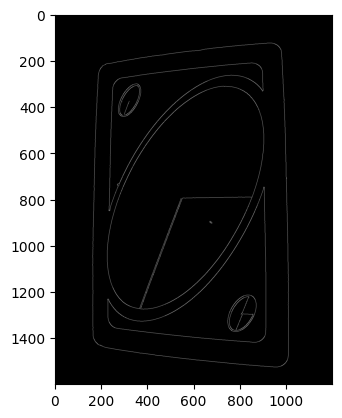

In [1205]:
print(np.unique(edges))
plt.imshow(edges, cmap='gray')

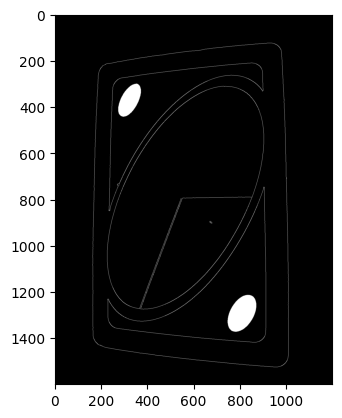

In [1206]:

# Find contours of the card
contours, _ = cv2.findContours(edges, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
# contours = np.array(contours[0])
# print(f'Found {(contours.shape)} contours')


# Create a white-filled mask for the card
filled_image = edges.copy()
for contour in contours:
    cv2.fillPoly(filled_image, [contour], (255, 255, 255))
plt.imshow(filled_image, cmap='gray')
plt.show()


# # Find the corners of the card
# corners = cv2.cornerHarris(edges, 2, 3, 0.04)
# corners = cv2.dilate(corners, None)

# # Threshold the corners
# filled_image[corners > 0.01 * corners.max()] = 255
# filled_image[corners <= 0.01 * corners.max()] = 0

# plt.imshow(corners, cmap='gray')
# plt.show()

# plt.imshow(filled_image, cmap='gray')
# plt.show()

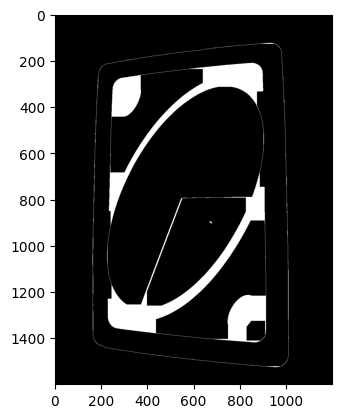

In [1207]:
def fill_card(img):
    kernel = np.ones((5, 5), np.uint8)
    iter_ = 15
    img = cv2.dilate(img, kernel, iterations=iter_)
    img = cv2.erode(img, kernel, iterations=iter_)

    return img

edges_new = fill_card(edges)
plt.imshow(edges_new, cmap='gray')

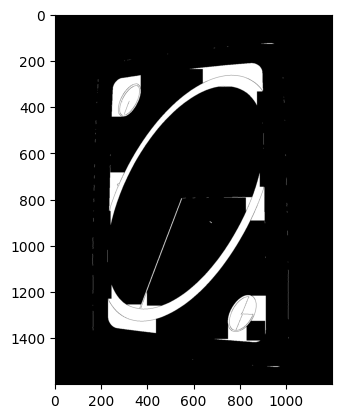

In [1208]:
diff = edges_new - edges
plt.imshow(diff, cmap='gray')

Number of vertices: 8


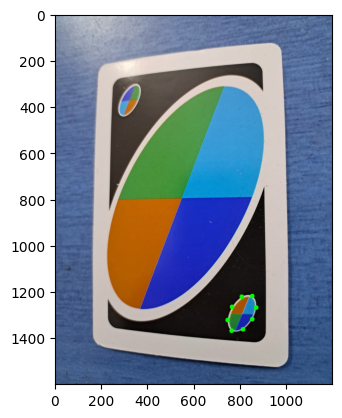

Number of vertices: 8


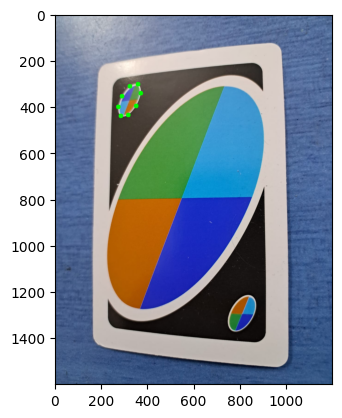

Number of vertices: 11


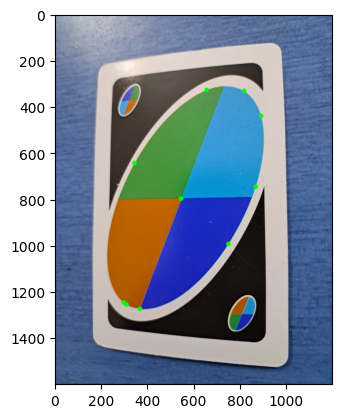

Number of vertices: 6


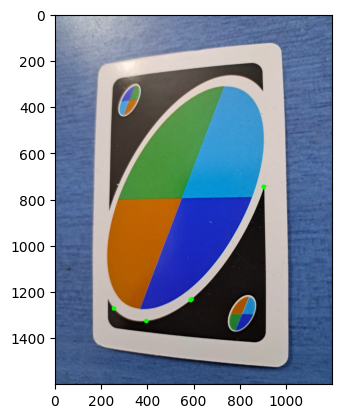

Number of vertices: 7


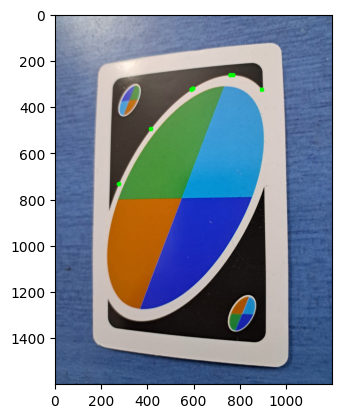

Number of vertices: 8


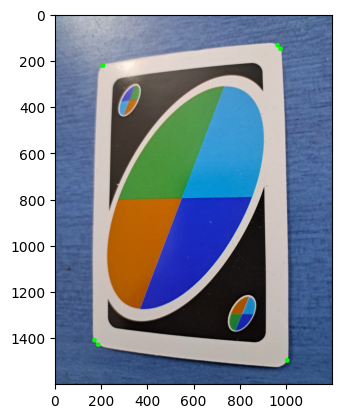

Number of vertices: 4


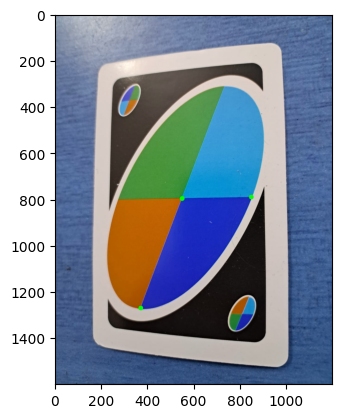

Processed image saved to detected_corners.jpg


In [1209]:

# Find contours
contours, _ = cv2.findContours(filled_image, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
# plt.imshow(edges_new, cmap='gray')

# for contour in contours:
#     # Get the bounding rectangle of each contour
#     x, y, w, h = cv2.boundingRect(contour)
#     cv2.rectangle(resized_image, (x, y), (x + w, y + h), (0, 255, 0), 2)
#     # print(f"Bounding box: x={x}, y={y}, w={w}, h={h}")

# Sort contours by area and take the largest one
contours = sorted(contours, key=cv2.contourArea, reverse=True)

# Approximate the contour to a polygon
for contour in contours:
    new_img = resized_image.copy()
    epsilon = 0.02 * cv2.arcLength(contour, True)
    approx = cv2.approxPolyDP(contour, epsilon, True)
    for app in approx:
        cv2.circle(new_img, tuple(app[0]), 10, (0, 255, 0), -1)
    print(f"Number of vertices: {len(approx)}")
    plt.imshow(new_img)
    plt.show()
    if len(approx) == 4:  # If the contour has 4 vertices, it might be the card
        card_corners = approx
        break

# Draw the detected corners on the image
output_image = resized_image.copy()
if 'card_corners' in locals():
    for point in card_corners:
        cv2.circle(output_image, tuple(point[0]), 10, (0, 255, 0), -1)
else:
    print("Card corners not found.")

# Save and display the output image
output_path = "detected_corners.jpg"
cv2.imwrite(output_path, output_image)

print(f"Processed image saved to {output_path}")


Point 1: (253, 1354)
Line 1: -1054x + -2y + 269370 = 0
Point 2: (255, 300)
Line 2: -82x + -620y + 206910 = 0
Point 3: (875, 218)
Line 3: 1179x + -28y + -1025521 = 0
Point 4: (903, 1397)
Line 4: -43x + 650y + -869221 = 0


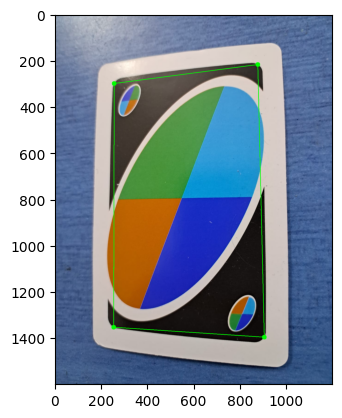

In [1210]:
# import cv2
# import numpy as np

# # Load the image
# image = get_card()

# # Thresholding to binary
# _, binary = cv2.threshold(image, 128, 255, cv2.THRESH_BINARY)

# # Edge detection
# edges = cv2.Canny(binary, 50, 150)

# Find contours
contours, _ = cv2.findContours(edges_new, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# Assume the largest contour is the card
largest_contour = max(contours, key=cv2.contourArea)

# Approximate the contour to a quadrilateral
epsilon = 0.02 * cv2.arcLength(largest_contour, True)
approx = cv2.approxPolyDP(largest_contour, epsilon, True)

temp_image = resized_image.copy()
for app in approx:
    cv2.circle(temp_image, tuple(app[0]), 10, (0, 255, 0), -1)

# plt.imshow(resized_image)
# plt.show()

# Extract the four points of the quadrilateral
if len(approx) == 4:
    points = approx.reshape((4, 2))
    points = np.array(sorted(points, key=lambda x: x[0]))
    for i in range(4):
        # Get endpoints of each side
        x1, y1 = points[i]
        print(f"Point {i+1}: ({x1}, {y1})")
        x2, y2 = points[(i+1) % 4]

        # Equation of the line: Ax + By + C = 0
        A = y2 - y1
        B = x1 - x2
        C = x2 * y1 - x1 * y2

        cv2.line(temp_image, tuple(points[i]), tuple(points[(i+1) % 4]), (0, 255, 0), 2)

        print(f"Line {i+1}: {A}x + {B}y + {C} = 0")
else:
    print("Contour approximation did not result in a quadrilateral.")

plt.imshow(temp_image)
plt.show()


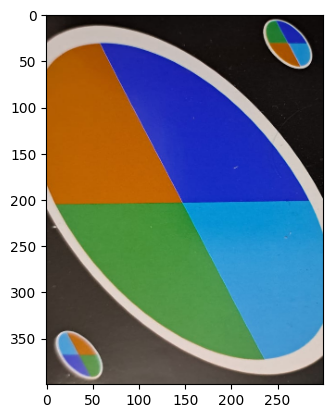

In [1211]:
# Crop the imsge to the four corners

corners = np.array([points[0], points[1], points[2], points[3]], dtype=np.float32)

# Define the dimensions of the output image
width = 300
height = 400

# Define the four corners of the output image
output_corners = np.array([[0, 0], [0, height],[width, 0], [width, height]], dtype=np.float32)
output_corners = np.array([[0, 0], [0, height], [width, height], [width, 0]], dtype=np.float32)

# Compute the perspective transform matrix
matrix = cv2.getPerspectiveTransform(corners, output_corners)

# Apply the perspective transform
output_image = cv2.warpPerspective(resized_image, matrix, (width, height))

plt.imshow(output_image)
plt.show()

In [1212]:
new_output = output_image.copy()
new_output = new_output[50:350, 25:275]

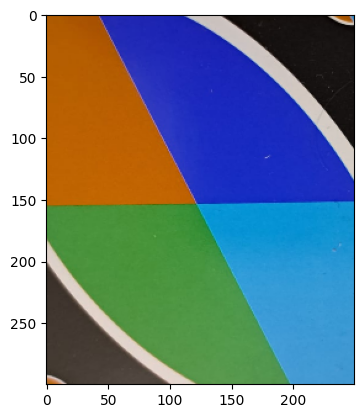

In [1213]:
# Display only a part of the image
plt.imshow(new_output)

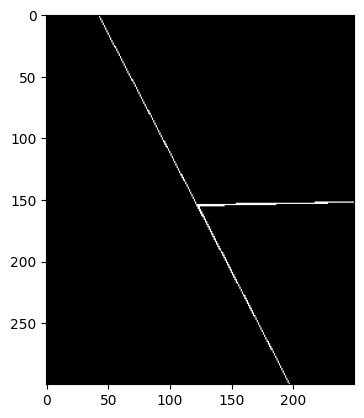

Number of vertices: 5


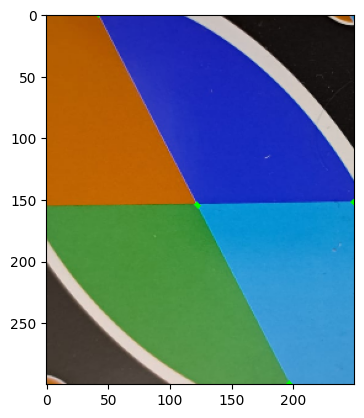

In [1214]:


# Apply edge detection
edges = cv2.Canny(new_output, 50, 150)
contours, _ = cv2.findContours(edges, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# Assume the largest contour is the card
largest_contour = max(contours, key=cv2.contourArea)

# second_largest = sorted(contours, key=cv2.contourArea, reverse=True)[1]

# Approximate the contour to a quadrilateral
epsilon = 0.02 * cv2.arcLength(largest_contour, True)
approx = cv2.approxPolyDP(largest_contour, epsilon, True)

# epsilon2 = 0.02 * cv2.arcLength(second_largest, True)
# approx2 = cv2.approxPolyDP(second_largest, epsilon2, True)

# for app in approx:
#     cv2.circle(resized_image, tuple(app[0]), 10, (0, 255, 0), -1)

# plt.imshow(resized_image)
# plt.show()

mask = np.zeros_like(new_output)
cv2.drawContours(mask, [approx], -1, (255, 255, 255), -1)
# cv2.drawContours(mask, [approx2], -1, (255, 255, 255), -1)
plt.imshow(mask, cmap='gray')
plt.imsave('mask.jpg', mask, cmap='gray')
plt.show()

print(f"Number of vertices: {len(approx)}")
for app in approx:
    cv2.circle(new_output, tuple(app[0]), 2, (0, 255, 0), -1)

plt.imshow(new_output)
plt.show()

[  0 255]


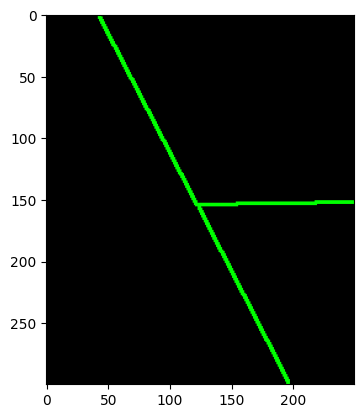

In [1215]:
# Skeletonize the mask
from skimage.morphology import skeletonize

skeleton = skeletonize(mask)
# skeleton = np.log1p(skeleton)
skeleton = (skeleton * 255).astype(np.uint8)

skeleton = cv2.dilate(skeleton, None, iterations=1)

print(np.unique(skeleton))
plt.imshow(skeleton, cmap='gray')

The number in the image does not match 4.


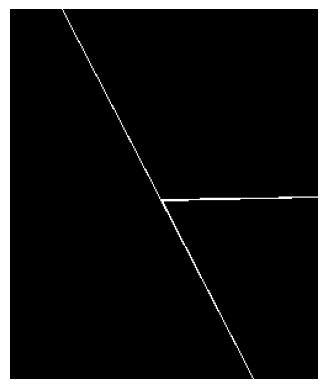

In [1216]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the image
image = cv2.imread("mask.jpg", cv2.IMREAD_GRAYSCALE)

# Thresholding (if not already binary)
_, binary_image = cv2.threshold(image, 127, 255, cv2.THRESH_BINARY)

# Find contours
contours, _ = cv2.findContours(binary_image, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# Get the largest contour
largest_contour = max(contours, key=cv2.contourArea)

# Compute Hu Moments (shape descriptors)
hu_moments = cv2.HuMoments(cv2.moments(largest_contour)).flatten()

# Load or define a template for "4" (precomputed or dynamically created)
# Example: Using a precomputed Hu moment for the digit "4"
template_hu_moments = [0.2, 0.004, 0.0002, 0.00001, 0.0, 0.0, 0.0]  # Replace with real values

# Compute similarity using a distance metric (e.g., Euclidean distance)
distance = np.linalg.norm(hu_moments - template_hu_moments)

# Threshold the distance to decide if the number matches "4"
if distance < 0.01:  # Adjust threshold as necessary
    print("The number in the image is 4.")
else:
    print("The number in the image does not match 4.")

# Optional: Display the binary image
plt.imshow(binary_image, cmap='gray')
plt.axis('off')
# plt.title("Binary Image")
plt.savefig('wild_template.png', bbox_inches='tight', pad_inches=0)
plt.show()


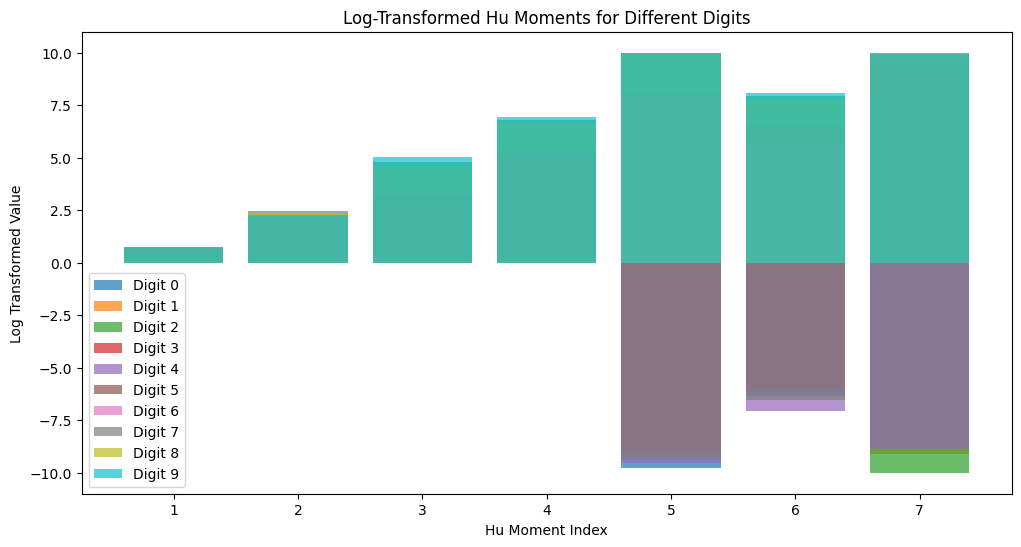

In [1217]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def calculate_hu_moments(image_path):
    # Load the image
    image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

    # Threshold the image (if not already binary)
    _, binary_image = cv2.threshold(image, 127, 255, cv2.THRESH_BINARY)

    # Find contours
    contours, _ = cv2.findContours(binary_image, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    largest_contour = max(contours, key=cv2.contourArea)

    # Compute Hu moments
    moments = cv2.moments(largest_contour)
    hu_moments = cv2.HuMoments(moments).flatten()

    return hu_moments

def plot_hu_moments(digit_hu_moments):
    plt.figure(figsize=(12, 6))

    for digit, moments in digit_hu_moments.items():
        # Log-transform the Hu moments for better visualization
        log_hu_moments = -np.sign(moments) * np.log10(np.abs(moments) + 1e-10)
        plt.bar(range(1, 8), log_hu_moments, alpha=0.7, label=f'Digit {digit}')

    plt.xlabel('Hu Moment Index')
    plt.ylabel('Log Transformed Value')
    plt.title('Log-Transformed Hu Moments for Different Digits')
    plt.legend()
    plt.show()

# Example: Calculate and plot Hu moments for digits 0-9
digit_hu_moments = {}
for digit in range(10):
    image_path = f"dataset/R{digit}-1.jpg"  # Replace with the path to your digit images
    hu_moments = calculate_hu_moments(image_path)
    digit_hu_moments[digit] = hu_moments

plot_hu_moments(digit_hu_moments)


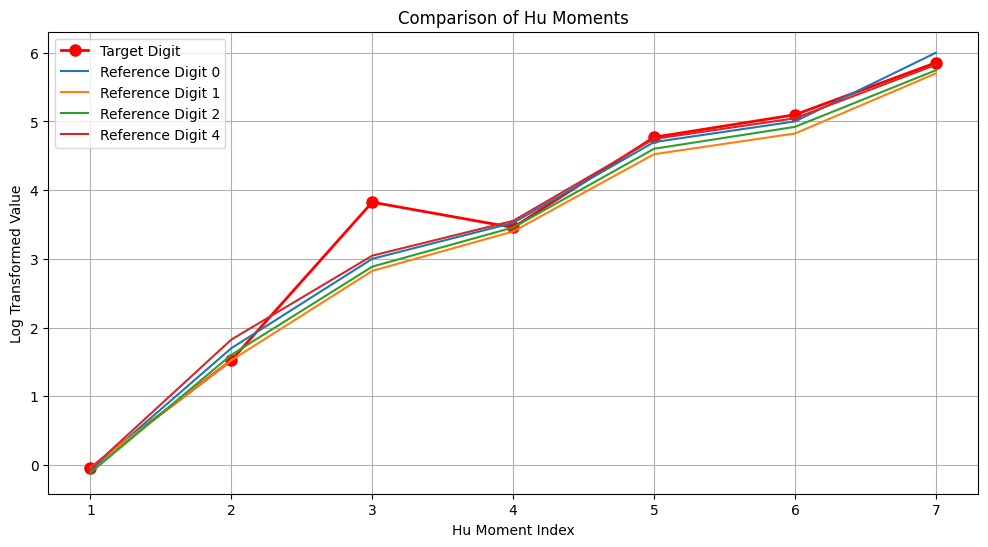

The identified digit is: 1


In [1218]:
import numpy as np
import matplotlib.pyplot as plt

# Example reference Hu moments for digits (replace with actual values)
reference_hu_moments = {
    0: [1.2, 0.02, 0.001, 0.0003, 0.00002, 0.00001, 0.000001],
    1: [1.1, 0.03, 0.0015, 0.0004, 0.00003, 0.000015, 0.000002],
    2: [1.3, 0.025, 0.0013, 0.00035, 0.000025, 0.000012, 0.0000018],
    4: [1.15, 0.015, 0.0009, 0.00028, 0.000018, 0.000009, 0.0000015]
}

# Target Hu moments for an unknown number (replace with actual values)
target_hu_moments = [1.1, 0.03, 0.00015, 0.00035, 0.000017, 0.000008, 0.0000014]

def plot_hu_moments_comparison(target_hu_moments, reference_hu_moments):
    plt.figure(figsize=(12, 6))

    # Log-transform the Hu moments for better visualization
    log_target_hu = -np.sign(target_hu_moments) * np.log10(np.abs(target_hu_moments) + 1e-10)
    plt.plot(range(1, 8), log_target_hu, 'ro-', label='Target Digit', linewidth=2, markersize=8)

    # Plot reference digits for comparison
    for digit, moments in reference_hu_moments.items():
        log_hu = -np.sign(moments) * np.log10(np.abs(moments) + 1e-10)
        plt.plot(range(1, 8), log_hu, label=f'Reference Digit {digit}')

    plt.xlabel('Hu Moment Index')
    plt.ylabel('Log Transformed Value')
    plt.title('Comparison of Hu Moments')
    plt.legend()
    plt.grid(True)
    plt.show()

# Call the function
plot_hu_moments_comparison(target_hu_moments, reference_hu_moments)
def identify_digit(target_hu_moments, reference_hu_moments):
    distances = {}
    # Convert target_hu_moments to a NumPy array
    target_hu_moments = np.array(target_hu_moments)

    for digit, moments in reference_hu_moments.items():
        # Convert each reference moment list to a NumPy array
        moments = np.array(moments)
        # Compute the Euclidean distance
        distances[digit] = np.linalg.norm(target_hu_moments - moments)

    # Return the digit with the smallest distance
    return min(distances, key=distances.get)

# Example usage
digit = identify_digit(target_hu_moments, reference_hu_moments)
print(f"The identified digit is: {digit}")
